In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv("abalone.csv")

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
x=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"]
y=["Rings"]

In [5]:
x,y

(['Sex',
  'Length',
  'Diameter',
  'Height',
  'Whole weight',
  'Shucked weight',
  'Viscera weight',
  'Shell weight'],
 ['Rings'])

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

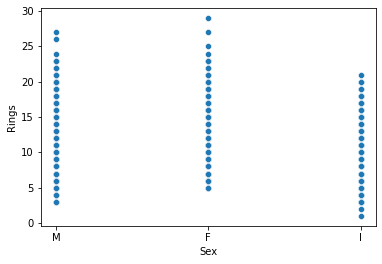

In [7]:
import seaborn as sns
sns.scatterplot(x="Sex", y="Rings",data=data)

<AxesSubplot:xlabel='Length', ylabel='Rings'>

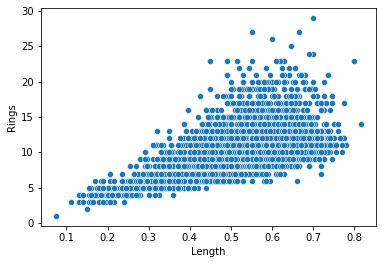

In [8]:
sns.scatterplot(x="Length", y="Rings",data=data)

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

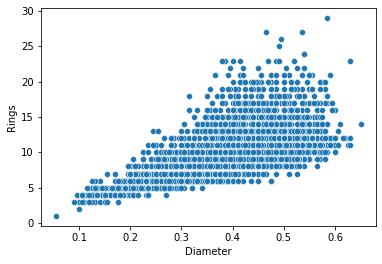

In [9]:
sns.scatterplot(x="Diameter", y="Rings",data=data)

<AxesSubplot:xlabel='Height', ylabel='Rings'>

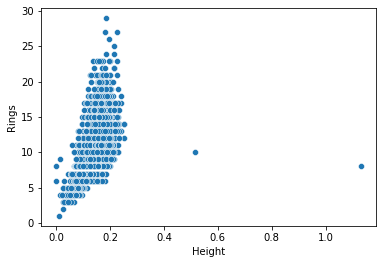

In [10]:
sns.scatterplot(x="Height", y="Rings",data=data)

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

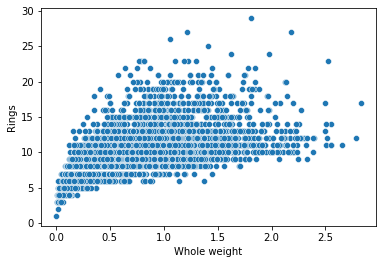

In [11]:
sns.scatterplot(x="Whole weight", y="Rings",data=data)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

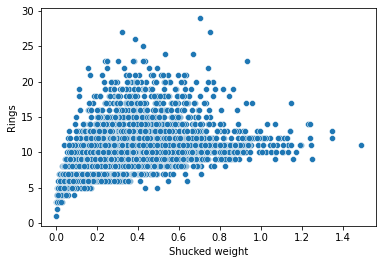

In [12]:
sns.scatterplot(x="Shucked weight", y="Rings",data=data)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

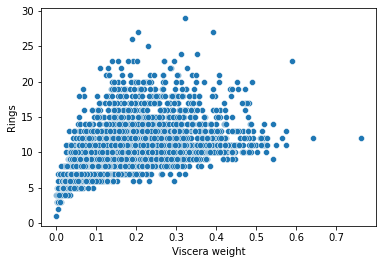

In [13]:
sns.scatterplot(x="Viscera weight", y="Rings",data=data)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

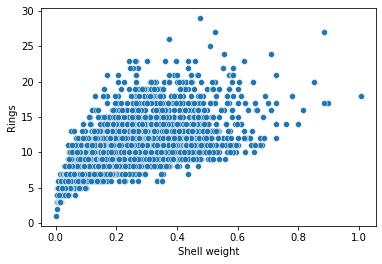

In [14]:
sns.scatterplot(x="Shell weight", y="Rings",data=data)

In [15]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

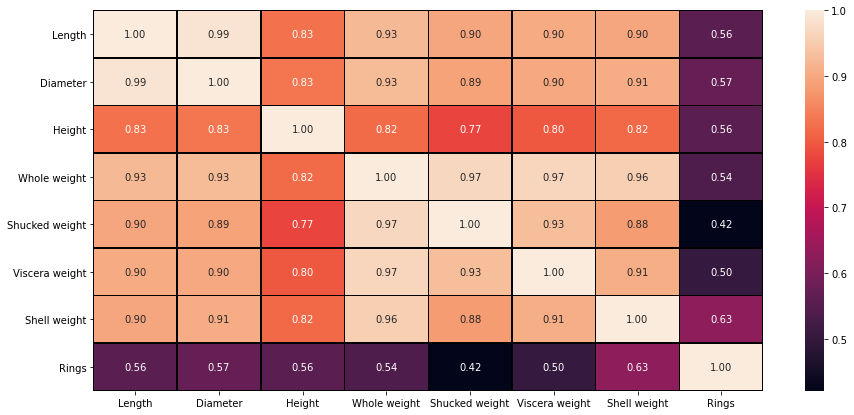

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor="black", fmt='.2f')

# Describe Data Set

In [17]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


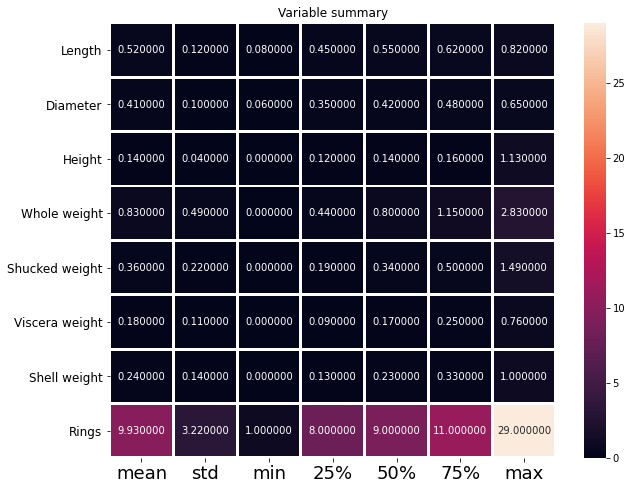

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable summary")
plt.show()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [20]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [21]:
# Normal Distribution Curve

<AxesSubplot:>

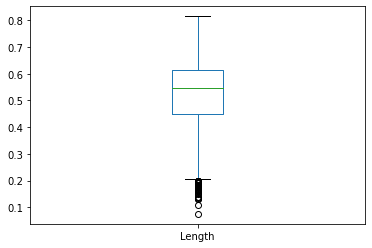

In [22]:
data["Length"].plot.box()

<AxesSubplot:>

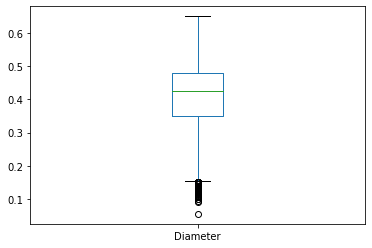

In [23]:
data["Diameter"].plot.box()

<AxesSubplot:>

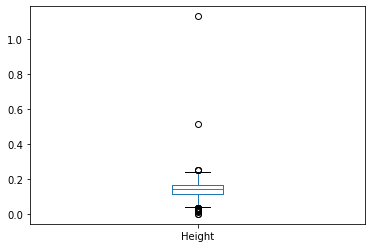

In [24]:
data["Height"].plot.box()

<AxesSubplot:>

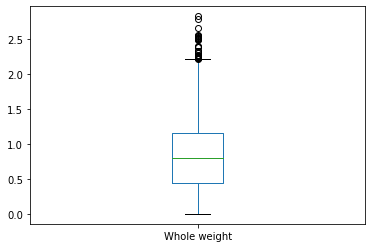

In [25]:
data["Whole weight"].plot.box()

<AxesSubplot:>

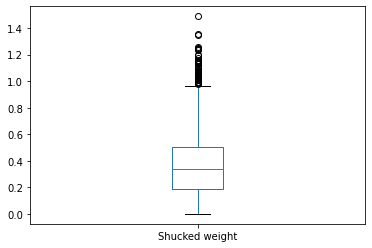

In [26]:
data["Shucked weight"].plot.box()

<AxesSubplot:>

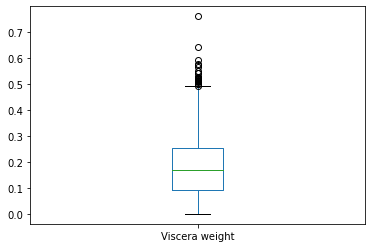

In [27]:
data["Viscera weight"].plot.box()

<AxesSubplot:>

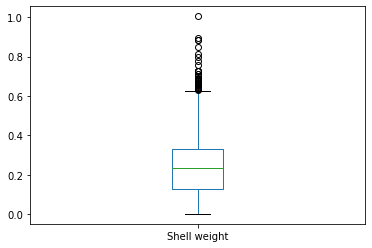

In [28]:
data["Shell weight"].plot.box()

<AxesSubplot:>

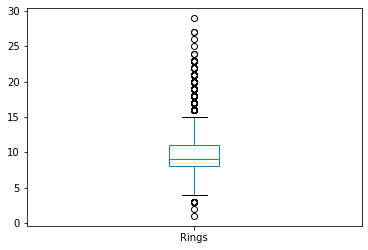

In [29]:
data["Rings"].plot.box()

In [30]:
# The normal distribution shows that the data is skewed.

In [31]:
# Data Cleaning:

In [32]:
delete = pd.DataFrame([["0.420884","Shucked weight","No","Alot"],["0.627574","Shell weight","No","Alot"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,0.420884,Shucked weight,No,Alot
1,0.627574,Shell weight,No,Alot


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Rings           4177 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 228.6+ KB


In [39]:
df=data.drop(["Shucked weight","Shell weight"],axis=1)

In [40]:
df

,Sex,Length,Diameter,Height,Whole weight,Viscera weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.1010,15
1,M,0.350,0.265,0.090,0.2255,0.0485,7
2,F,0.530,0.420,0.135,0.6770,0.1415,9
3,M,0.440,0.365,0.125,0.5160,0.1140,10
4,I,0.330,0.255,0.080,0.2050,0.0395,7
...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.2390,11
4173,M,0.590,0.440,0.135,0.9660,0.2145,10
4174,M,0.600,0.475,0.205,1.1760,0.2875,9
4175,F,0.625,0.485,0.150,1.0945,0.2610,10


# Considering the outlier removal


# Removing outliers:


Z-Score

In [41]:
data.shape

(4177, 9)

In [52]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Viscera weight    0.1595
Rings             3.0000
dtype: float64


In [53]:
df_new1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new1.shape)

(3809, 7)


In [55]:
percentage_loss=((4177-3809)/4177)*100
print(percentage_loss)

8.81015082595164


The percentage loss in the z-score is less so we prefer z-score over IQR

In [57]:
x = df_new1.iloc[:,:-1]
y = df_new1.iloc[:,-1]

In [76]:
x.head()

,Sex,Length,Diameter,Height,Whole weight,Viscera weight
0,M,0.455,0.365,0.095,0.5140,0.1010
1,M,0.350,0.265,0.090,0.2255,0.0485
2,F,0.530,0.420,0.135,0.6770,0.1415
3,M,0.440,0.365,0.125,0.5160,0.1140
4,I,0.330,0.255,0.080,0.2050,0.0395


In [128]:
# import LabelEncoder for encode
from sklearn.preprocessing import LabelEncoder

In [125]:
le = LabelEncoder()
label = le.fit_transform(x["Sex"])

In [126]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

In [132]:
label

array([2, 2, 0, ..., 2, 0, 2])

In [138]:
data = x.drop("Sex", axis="columns")
data.head(5)

,Length,Diameter,Height,Whole weight,Viscera weight
0,0.455,0.365,0.095,0.5140,0.1010
1,0.350,0.265,0.090,0.2255,0.0485
2,0.530,0.420,0.135,0.6770,0.1415
3,0.440,0.365,0.125,0.5160,0.1140
4,0.330,0.255,0.080,0.2050,0.0395


In [140]:
data["Sex"] =label

In [143]:
# after encoding processed
data.head(5)

,Length,Diameter,Height,Whole weight,Viscera weight,Sex
0,0.455,0.365,0.095,0.5140,0.1010,2
1,0.350,0.265,0.090,0.2255,0.0485,2
2,0.530,0.420,0.135,0.6770,0.1415,0
3,0.440,0.365,0.125,0.5160,0.1140,2
4,0.330,0.255,0.080,0.2050,0.0395,1


In [144]:
data.Sex.value_counts()

2    1380
1    1262
0    1167
Name: Sex, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [147]:
# Transforming data to remove skewness

In [148]:
from sklearn.preprocessing import power_transform
data=power_transform(data,method= 'yeo-johnson')

In [152]:
data

array([[-0.68607817, -0.53986922, -1.19312568, -0.56489168, -0.68743161,
         1.13372162],
       [-1.4552921 , -1.44229081, -1.32431494, -1.37870922, -1.35448352,
         1.13372162],
       [-0.03358468,  0.05276746, -0.10562627, -0.16587784, -0.23035259,
        -1.32046455],
       ...,
       [ 0.66097834,  0.72144152,  1.96413615,  0.86675063,  1.09620695,
         1.13372162],
       [ 0.9303916 ,  0.8516812 ,  0.31982843,  0.71395494,  0.8868825 ,
        -1.32046455],
       [ 1.93619924,  1.84294848,  1.65519176,  2.10101994,  1.71864426,
         1.13372162]])

In [154]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(data)
x

array([[-0.68607817, -0.53986922, -1.19312568, -0.56489168, -0.68743161,
         1.13372162],
       [-1.4552921 , -1.44229081, -1.32431494, -1.37870922, -1.35448352,
         1.13372162],
       [-0.03358468,  0.05276746, -0.10562627, -0.16587784, -0.23035259,
        -1.32046455],
       ...,
       [ 0.66097834,  0.72144152,  1.96413615,  0.86675063,  1.09620695,
         1.13372162],
       [ 0.9303916 ,  0.8516812 ,  0.31982843,  0.71395494,  0.8868825 ,
        -1.32046455],
       [ 1.93619924,  1.84294848,  1.65519176,  2.10101994,  1.71864426,
         1.13372162]])

In [155]:
# Since the outcome has not only two variable we will use Linear Regression

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [158]:
import warnings
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=i, test_size=0.20)
lr.fit(x_train,y_train)

LogisticRegression()

In [159]:
pred_y = lr.predict(x_test)

In [160]:
pred_y

array([10, 10,  8,  6, 10,  8, 10,  9, 10, 11,  9, 10,  9,  6,  8,  9,  7,
       11, 11, 10,  9, 10,  9,  8,  6,  9, 11,  6,  7,  8,  8,  5,  7,  8,
       11, 11, 11,  9, 11,  8,  8,  8, 10,  9, 10,  9,  8, 10,  8,  9,  8,
        7,  9,  8, 10,  7,  9,  6, 10, 11,  7, 10, 11, 10,  7,  9,  8,  7,
        8,  9,  9,  6,  9,  7,  8,  9, 10, 10,  9,  9,  7,  8,  9,  9, 10,
        8, 11,  9,  6, 10,  9,  6,  7,  9, 10,  7,  8, 10,  5, 10, 11, 10,
        9, 10,  8,  7,  9,  8,  9,  6, 10, 10, 11,  9,  5,  8,  6, 11, 10,
        9,  8,  7,  7,  9,  9,  8,  8, 10,  5,  9,  9, 10, 11, 11,  5,  8,
       10, 11,  9, 10,  8,  5, 11,  7, 10,  8,  8,  7, 11,  9,  9,  7, 10,
        8, 10, 10,  8, 11,  5,  8,  8,  6,  8, 11,  9,  6,  7, 13, 10,  8,
       11, 10,  6, 10,  7,  8, 10,  8, 11, 11,  9,  7,  8,  9, 10,  8,  9,
       10,  7,  6,  6,  9,  7,  7,  9,  8, 10,  8,  8,  5,  8, 10,  9,  8,
        7,  9,  9, 11,  6,  5,  9,  7, 10,  8,  9, 11, 10,  8, 11, 10, 10,
       10,  7,  8, 10,  7

In [161]:
from sklearn.model_selection import train_test_split

In [163]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred_y = mod.predict(x_test)
    acc=accuracy_score(y_test,pred_y)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
        print("Best accuracy is",maxAccu, "on random_state",maxRs)

Best accuracy is 0.17979002624671916 on random_state 1
Best accuracy is 0.22965879265091863 on random_state 2
Best accuracy is 0.23097112860892388 on random_state 58
Best accuracy is 0.23228346456692914 on random_state 91


In [164]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.20, random_state=1000)
from sklearn.metrics import r2_score

In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        14
           6       0.05      0.06      0.06        47
           7       0.03      0.04      0.04        71
           8       0.10      0.11      0.10       112
           9       0.17      0.14      0.15       151
          10       0.14      0.13      0.13       127
          11       0.16      0.15      0.16        99
          12       0.07      0.05      0.06        60
          13       0.07      0.09      0.08        35
          14       0.04      0.05      0.04        22
          15       0.00      0.00      0.00        18

    accuracy                           0.10       762
   macro avg       0.07      0.07      0.07       762
weighted avg       0.11      0.10      0.10       762



In [166]:
# Cross Validation score for logistic Regression

In [167]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("\n")

At cv:- 2
Cross validation score is:- 27.566374975186925


At cv:- 3
Cross validation score is:- 26.8578188955695


At cv:- 4
Cross validation score is:- 26.858433562302153


At cv:- 5
Cross validation score is:- 26.96272689961061


At cv:- 6
Cross validation score is:- 26.726446260463504


At cv:- 7
Cross validation score is:- 26.9903052964305


At cv:- 8
Cross validation score is:- 26.963536987121895


At cv:- 9
Cross validation score is:- 26.806627315124576




In [168]:
# Since cross validation score accuracy score are almost same. We are heading with a good approach

In [169]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ", lsscore_selected,"\n" " The accuracy score is: ",lsscore)

The cv score is:  0.26858433562302153 
 The accuracy score is:  [0.22877358 0.24292453 0.29787234 0.27895981 0.25295508 0.26241135
 0.28841608 0.27186761 0.28841608]


In [170]:
# The Model with the outliers:

In [172]:
#Model Saving:


In [173]:
import pickle
filename = 'aabalone.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [174]:
# Conclusion:

In [175]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,8,6
1,10,9
2,8,9
3,12,10
4,9,9
...,...,...
757,8,10
758,11,10
759,10,9
760,6,7
